In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences , to_categorical
from keras import Sequential
from keras.layers import Dense , SimpleRNN , Embedding , Flatten


In [3]:
train = pd.read_csv("train.csv",encoding='latin1')
train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [4]:
validation = pd.read_csv("test.csv",encoding='latin1')
validation.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [5]:
train = train[["text","sentiment"]]
validation = validation[["text","sentiment"]]

In [6]:
train["text"].fillna(" ",inplace=True)
validation["text"].fillna(" ",inplace=True)

In [7]:
def func(sentiment):
    if sentiment=="positive":
        return 0 ;
    elif sentiment=="negative":
        return 1 ;
    else:
        return 2;
train["sentiment"]=train["sentiment"].apply(func)
validation["sentiment"]=validation["sentiment"].apply(func)

In [8]:
X_train = np.array(train["text"].tolist())
y_train = np.array(train["sentiment"].tolist())
X_test = np.array(validation["text"].tolist())
y_test = np.array(validation["sentiment"].tolist())

In [9]:
X_train

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype='<U159')

In [10]:
y_train

array([2, 1, 1, ..., 0, 0, 2])

In [11]:
y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test,3)

In [12]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [13]:
tokenizer = Tokenizer(num_words=20000)

In [14]:
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [15]:
len(tokenizer.word_index)

28614

In [16]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [17]:
X_train = pad_sequences(X_train , padding='post',maxlen=35)
X_test = pad_sequences(X_test , padding='post',maxlen=35)

In [18]:
X_train[0]

array([   1,  162,   19, 7713,   71,    1,  151,   49,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0])

In [19]:
X_train.shape

(27481, 35)

In [20]:
model = Sequential()
model.add(Embedding(input_dim=20000,output_dim=5,input_length=35))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(3,activation='softmax'))          

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [22]:
history = model.fit(X_train , y_train , epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4724 - loss: 1.0038 - val_accuracy: 0.7425 - val_loss: 0.7161
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6919 - loss: 0.7309 - val_accuracy: 0.7630 - val_loss: 0.6385
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7703 - loss: 0.5906 - val_accuracy: 0.7672 - val_loss: 0.6198
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8181 - loss: 0.4899 - val_accuracy: 0.7410 - val_loss: 0.6279
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8481 - loss: 0.4288 - val_accuracy: 0.7558 - val_loss: 0.6234
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8703 - loss: 0.3719 - val_accuracy: 0.7464 - val_loss: 0.6949
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8917 - loss: 0.3294 - val_accuracy: 0.7385 - val_loss: 0.7463
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9076 - loss: 0.2851 - val_accuracy: 0.

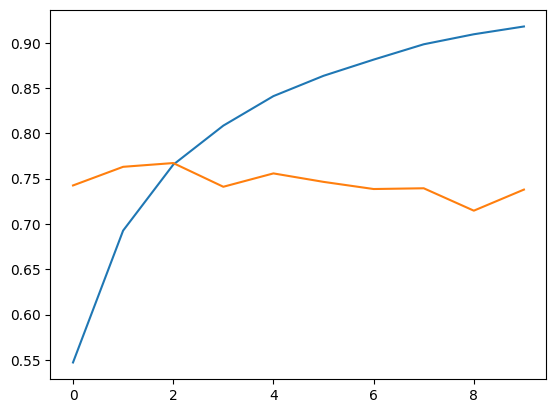

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [24]:
text = "I was sad when it rained on my picnic day."
sequence = tokenizer.texts_to_sequences([text])
padding = pad_sequences(sequence , padding='post',maxlen=35)
pred = model.predict(padding)
pred_class = pred.argmax(axis=-1)
if pred_class[0] == 0:
    print("Positive Sentiment");
elif pred_class[0] == 1:
    print("Negative Sentiment")
else :
    print("Natural Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Negative Sentiment


In [25]:
text = "I absolutely loved the movie I watched last night. It was so heartwarming and inspiring!"
sequence = tokenizer.texts_to_sequences([text])
padding = pad_sequences(sequence , padding='post',maxlen=35)
pred = model.predict(padding)
pred_class = pred.argmax(axis=-1)
if pred_class[0] == 0:
    print("Positive Sentiment");
elif pred_class[0] == 1:
    print("Negative Sentiment")
else :
    print("Natural Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Positive Sentiment


In [26]:
text = input("Enter any Sentence :")
sequence = tokenizer.texts_to_sequences([text])
padding = pad_sequences(sequence , padding='post',maxlen=35)
pred = model.predict(padding)
pred_class = pred.argmax(axis=-1)
if pred_class[0] == 0:
    print("Positive Sentiment");
elif pred_class[0] == 1:
    print("Negative Sentiment")
else :
    print("Natural Sentiment")

Enter any Sentence : hello


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Natural Sentiment
